In [10]:
!pip install mlxtend

note: ผมทำบน Jupyter notebook นะครับ

In [11]:
import pandas as pd

df = pd.read_csv('./Prod_Rec.csv', index_col='Transaction')
df.head()

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,...,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
Transaction,,,,,,,,,,,,,,,,,,,,,
1,10/28/2021 14:05,NaN,NaN,NaN,1,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,1,1,1,...,0,0,1,0,1,0,1,0,0,1
3,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,0,1,0,...,0,1,1,1,0,1,0,0,0,0
5,10/28/2021 14:06,NaN,NaN,NaN,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('./K2D/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

<font size=5><b>Preparing Data

In [14]:
#define needless columns
needless_col = df.columns[:4]
needless_col

Index(['Timestamp', 'โปรแกรมแท้', 'เครื่องซักผ้า', 'NONE'], dtype='object')

In [15]:
df.drop(needless_col, axis=1, inplace=True)
df.head()

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,...,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
Transaction,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,1,1,1,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
3,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,1,0,1,0,1,1,0,1,...,0,1,1,1,0,1,0,0,0,0
5,1,1,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [16]:
missing = df.isnull().sum()
print(missing)

รองเท้าวิ่ง                               0
ผักกรอบ                                   0
คอร์สเรียนเสริม                           0
nintendo switch                           0
BTC (Bitcoin)                             0
mechanical keyboard                       0
เครื่องดูดฝุ่น Dyson                      0
เคส ipad                                  0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่            0
สินค้าจากพิมรี่พาย                        0
I PHONE 13                                0
หูฟัง bluetooth (airpods,truewireless)    0
แก้วน้ำ Starbucks                         0
เบาะรองนั่ง                               0
เครื่องชงกาแฟแคปซูล                       0
ตั๋วเครื่องบินไปญี่ปุ่น                   0
Ebook                                     0
ตู้เย็น                                   0
กล้องฟิล์ม                                0
เครื่องดนตรี                              0
whey protein                              0
วัตถุมงคล                                 0
กระบองเพชรพูดได้                

In [17]:
print('items ทั้งหมดใน list เรา: \n', df.columns.unique())


items ทั้งหมดใน list เรา: 
 Index(['รองเท้าวิ่ง', 'ผักกรอบ', 'คอร์สเรียนเสริม', 'nintendo switch',
       'BTC (Bitcoin)', 'mechanical keyboard', 'เครื่องดูดฝุ่น Dyson',
       'เคส ipad', 'คุณเคยซื้อโต๊ะปรับระดับหรือไม่', 'สินค้าจากพิมรี่พาย',
       'I PHONE 13', 'หูฟัง bluetooth (airpods,truewireless)',
       'แก้วน้ำ Starbucks', 'เบาะรองนั่ง', 'เครื่องชงกาแฟแคปซูล',
       'ตั๋วเครื่องบินไปญี่ปุ่น', 'Ebook', 'ตู้เย็น', 'กล้องฟิล์ม',
       'เครื่องดนตรี', 'whey protein', 'วัตถุมงคล ', 'กระบองเพชรพูดได้',
       'ROV Skin'],
      dtype='object')


In [18]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

hot_encoded_df = df.applymap(encode_units)

<font size=5><b>EDA

In [19]:
df.describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
รองเท้าวิ่ง,29.0,0.965517,0.185695,0.0,1.0,1.0,1.0,1.0
คอร์สเรียนเสริม,29.0,0.931034,0.257881,0.0,1.0,1.0,1.0,1.0
เคส ipad,29.0,0.896552,0.309934,0.0,1.0,1.0,1.0,1.0
"หูฟัง bluetooth (airpods,truewireless)",29.0,0.758621,0.435494,0.0,1.0,1.0,1.0,1.0
Ebook,29.0,0.655172,0.483725,0.0,0.0,1.0,1.0,1.0
เครื่องดนตรี,29.0,0.551724,0.506120,0.0,0.0,1.0,1.0,1.0
เบาะรองนั่ง,29.0,0.551724,0.506120,0.0,0.0,1.0,1.0,1.0
BTC (Bitcoin),29.0,0.448276,0.506120,0.0,0.0,0.0,1.0,1.0
ตู้เย็น,29.0,0.413793,0.501230,0.0,0.0,0.0,1.0,1.0
ผักกรอบ,29.0,0.344828,0.483725,0.0,0.0,0.0,1.0,1.0


## Market Basket Analysis

In [20]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.5, use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.965517,(รองเท้าวิ่ง)
1,0.931034,(คอร์สเรียนเสริม)
2,0.896552,(เคส ipad)
3,0.758621,"(หูฟัง bluetooth (airpods,truewireless))"
4,0.551724,(เบาะรองนั่ง)
5,0.655172,(Ebook)
6,0.551724,(เครื่องดนตรี)
7,0.896552,"(คอร์สเรียนเสริม, รองเท้าวิ่ง)"
8,0.862069,"(เคส ipad, รองเท้าวิ่ง)"
9,0.758621,"(หูฟัง bluetooth (airpods,truewireless), รองเท..."


In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
2,(Ebook),(รองเท้าวิ่ง),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
3,(รองเท้าวิ่ง),(Ebook),0.965517,0.655172,0.655172,0.678571,1.035714,0.022592,1.072797
4,(เบาะรองนั่ง),(คอร์สเรียนเสริม),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
5,(คอร์สเรียนเสริม),(เบาะรองนั่ง),0.931034,0.551724,0.551724,0.592593,1.074074,0.038050,1.100313
6,(Ebook),(คอร์สเรียนเสริม),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
7,(คอร์สเรียนเสริม),(Ebook),0.931034,0.655172,0.620690,0.666667,1.017544,0.010702,1.034483
8,(เครื่องดนตรี),(คอร์สเรียนเสริม),0.551724,0.931034,0.517241,0.937500,1.006944,0.003567,1.103448
9,(คอร์สเรียนเสริม),(เครื่องดนตรี),0.931034,0.551724,0.517241,0.555556,1.006944,0.003567,1.008621


In [22]:
print(rules.shape)
rules.sort_values('lift',ascending=False).head(15)

(108, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
86,"(คอร์สเรียนเสริม, เคส ipad)","(เบาะรองนั่ง, รองเท้าวิ่ง)",0.827586,0.517241,0.517241,0.625000,1.208333,0.089180,1.287356
89,"(เบาะรองนั่ง, รองเท้าวิ่ง)","(คอร์สเรียนเสริม, เคส ipad)",0.517241,0.827586,0.517241,1.000000,1.208333,0.089180,inf
57,(เบาะรองนั่ง),"(คอร์สเรียนเสริม, เคส ipad)",0.551724,0.827586,0.551724,1.000000,1.208333,0.095125,inf
56,"(คอร์สเรียนเสริม, เคส ipad)",(เบาะรองนั่ง),0.827586,0.551724,0.551724,0.666667,1.208333,0.095125,1.344828
92,(เบาะรองนั่ง),"(รองเท้าวิ่ง, คอร์สเรียนเสริม, เคส ipad)",0.551724,0.793103,0.517241,0.937500,1.182065,0.079667,3.310345
83,"(รองเท้าวิ่ง, คอร์สเรียนเสริม, เคส ipad)",(เบาะรองนั่ง),0.793103,0.551724,0.517241,0.652174,1.182065,0.079667,1.288793
69,(เครื่องดนตรี),"(คอร์สเรียนเสริม, เคส ipad)",0.551724,0.827586,0.517241,0.937500,1.132813,0.060642,2.758621
68,"(คอร์สเรียนเสริม, เคส ipad)",(เครื่องดนตรี),0.827586,0.551724,0.517241,0.625000,1.132812,0.060642,1.195402
97,"(รองเท้าวิ่ง, คอร์สเรียนเสริม, เคส ipad)",(Ebook),0.793103,0.655172,0.586207,0.739130,1.128146,0.066587,1.321839
104,(Ebook),"(รองเท้าวิ่ง, คอร์สเรียนเสริม, เคส ipad)",0.655172,0.793103,0.586207,0.894737,1.128146,0.066587,1.965517


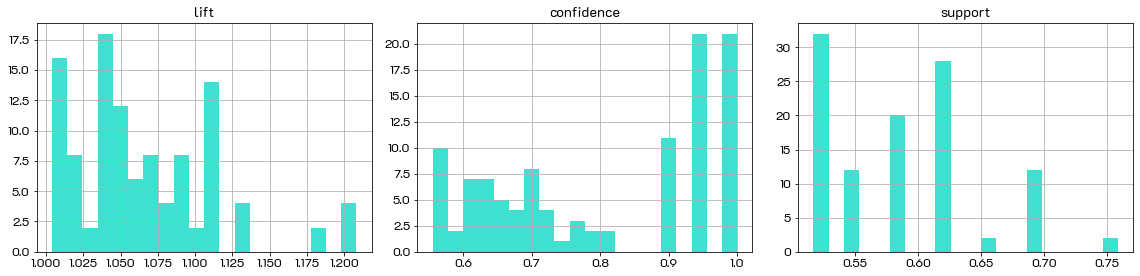

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)
for var, ax in zip(['lift','confidence','support'], axes):
    rules[var].hist(bins=20, ax=ax, color='turquoise')
    ax.set_title(var)
plt.show()

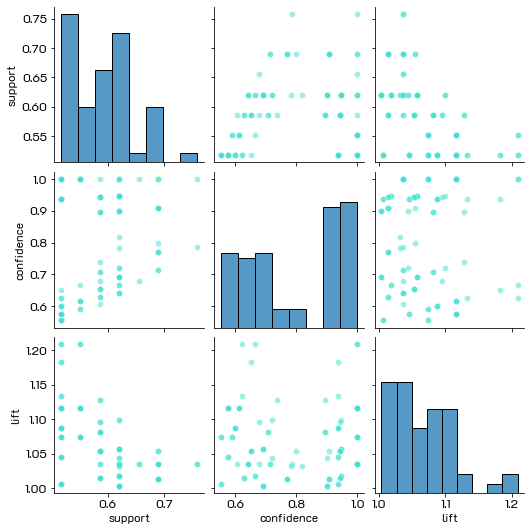

In [24]:
sns.pairplot(rules, vars=['support','confidence','lift'], plot_kws = {'color':'turquoise', 'alpha':.5});

In [25]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] > 1.05) & (rules['confidence'] > 0.5)]
print(simple_rules.shape)
simple_rules.sort_values('lift', ascending=False).head(20)

(8, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(เบาะรองนั่ง),(เคส ipad),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
13,(เคส ipad),(เบาะรองนั่ง),0.896552,0.551724,0.551724,0.615385,1.115385,0.057075,1.165517
16,(เครื่องดนตรี),(เคส ipad),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
17,(เคส ipad),(เครื่องดนตรี),0.896552,0.551724,0.551724,0.615385,1.115385,0.057075,1.165517
4,(เบาะรองนั่ง),(คอร์สเรียนเสริม),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
5,(คอร์สเรียนเสริม),(เบาะรองนั่ง),0.931034,0.551724,0.551724,0.592593,1.074074,0.038050,1.100313
14,(Ebook),(เคส ipad),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
15,(เคส ipad),(Ebook),0.896552,0.655172,0.620690,0.692308,1.056680,0.033294,1.120690


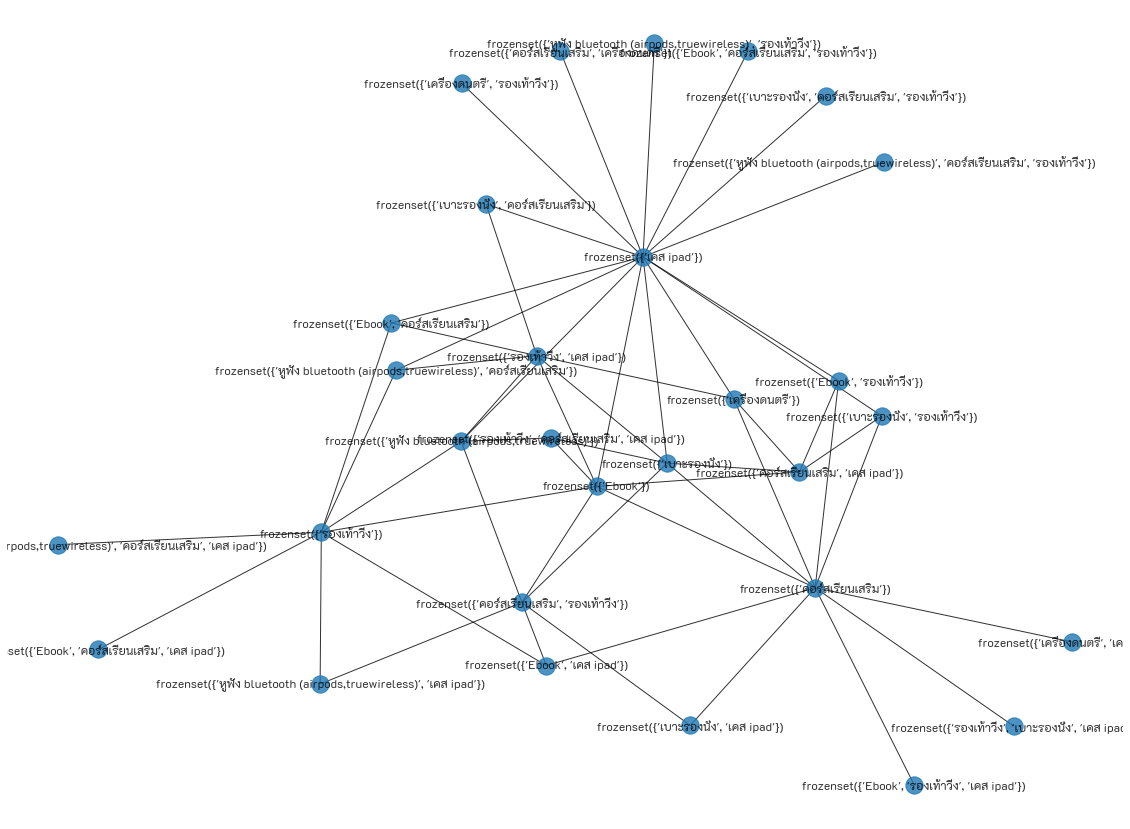

In [33]:
fig, ax=plt.subplots(figsize=(20,15))
labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,  **labels_params)
plt.show()

<b>note:</b> จะเห็น คอร์สเรียนเสริม , รองเท้าวิ่ง กับ เคส ipad. ที่มักเกิดร่วมกับ items อื่นๆเยอะ

<font size=5><b>  plot ดูย่อยๆ 

In [35]:
edgelist = []
for i,x in simple_rules.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'],4) }
    edgelist.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in edgelist}.union({ n2 for n1, n2, attr in edgelist})

support_df = frequent_itemsets[frequent_itemsets['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))

# create graph
G = nx.DiGraph()

G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

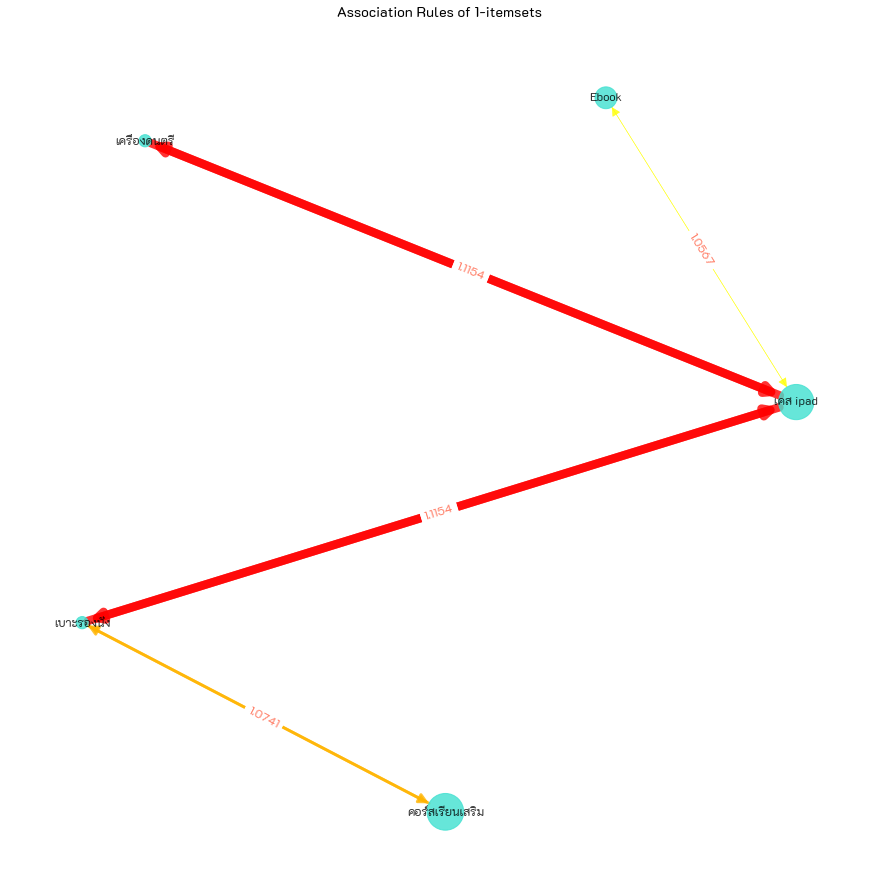

In [36]:


nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
edgelist, width = zip(*[((u,v), d['lift'])for u,v,d in G.edges(data=True)])

width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8

labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G, k=5, weight='lift', iterations=120, seed=120, scale=2.5)
pos = nx.spring_layout(G, k=5, weight='lift', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos, with_labels=True, arrowsize=20, 
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.autumn_r, #edge_color='.75',
        nodelist=nodelist, node_size=node_size, node_color='turquoise', 
        **labels_params)
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='tomato',  **labels_params)

plt.title('Association Rules of 1-itemsets')
# plt.savefig('plots/association-rules-1.jpg', dpi=120)
plt.show()

In [37]:
# Recommend 1 item based on 2 items
rules[(rules['antecedents'].apply(len) == 2) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56,"(คอร์สเรียนเสริม, เคส ipad)",(เบาะรองนั่ง),0.827586,0.551724,0.551724,0.666667,1.208333,0.095125,1.344828
68,"(คอร์สเรียนเสริม, เคส ipad)",(เครื่องดนตรี),0.827586,0.551724,0.517241,0.625000,1.132812,0.060642,1.195402
66,"(คอร์สเรียนเสริม, เครื่องดนตรี)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
54,"(เบาะรองนั่ง, คอร์สเรียนเสริม)",(เคส ipad),0.551724,0.896552,0.551724,1.000000,1.115385,0.057075,inf
49,"(เครื่องดนตรี, รองเท้าวิ่ง)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
38,"(เบาะรองนั่ง, รองเท้าวิ่ง)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
44,"(รองเท้าวิ่ง, เคส ipad)",(Ebook),0.862069,0.655172,0.620690,0.720000,1.098947,0.055886,1.231527
48,"(รองเท้าวิ่ง, เคส ipad)",(เครื่องดนตรี),0.862069,0.551724,0.517241,0.600000,1.087500,0.041617,1.120690
39,"(รองเท้าวิ่ง, เคส ipad)",(เบาะรองนั่ง),0.862069,0.551724,0.517241,0.600000,1.087500,0.041617,1.120690
62,"(คอร์สเรียนเสริม, เคส ipad)",(Ebook),0.827586,0.655172,0.586207,0.708333,1.081140,0.043995,1.182266


In [38]:
# Recommend 1 item based on 3 items
rules[(rules['antecedents'].apply(len) == 3) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,"(รองเท้าวิ่ง, คอร์สเรียนเสริม, เคส ipad)",(เบาะรองนั่ง),0.793103,0.551724,0.517241,0.652174,1.182065,0.079667,1.288793
97,"(รองเท้าวิ่ง, คอร์สเรียนเสริม, เคส ipad)",(Ebook),0.793103,0.655172,0.586207,0.739130,1.128146,0.066587,1.321839
84,"(เบาะรองนั่ง, คอร์สเรียนเสริม, รองเท้าวิ่ง)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
82,"(รองเท้าวิ่ง, เบาะรองนั่ง, เคส ipad)",(คอร์สเรียนเสริม),0.517241,0.931034,0.517241,1.000000,1.074074,0.035672,inf
96,"(Ebook, คอร์สเรียนเสริม, รองเท้าวิ่ง)",(เคส ipad),0.620690,0.896552,0.586207,0.944444,1.053419,0.029727,1.862069
72,"(หูฟัง bluetooth (airpods,truewireless), คอร์ส...",(รองเท้าวิ่ง),0.620690,0.965517,0.620690,1.000000,1.035714,0.021403,inf
94,"(Ebook, คอร์สเรียนเสริม, เคส ipad)",(รองเท้าวิ่ง),0.586207,0.965517,0.586207,1.000000,1.035714,0.020214,inf
74,"(รองเท้าวิ่ง, คอร์สเรียนเสริม, เคส ipad)","(หูฟัง bluetooth (airpods,truewireless))",0.793103,0.758621,0.620690,0.782609,1.031621,0.019025,1.110345
95,"(Ebook, รองเท้าวิ่ง, เคส ipad)",(คอร์สเรียนเสริม),0.620690,0.931034,0.586207,0.944444,1.014403,0.008323,1.241379
73,"(หูฟัง bluetooth (airpods,truewireless), คอร์ส...",(เคส ipad),0.689655,0.896552,0.620690,0.900000,1.003846,0.002378,1.034483


จากที่เคยสรุปไปว่า จะเห็นว่า รองเท้าวิ่ง, คอร์สเรียนเสริม และ เคส ipad มีค่า rank ของ <b>antecedents</b> สูงสุด (สินค้าทั้งสามนี้มักจะโยงไปยังสินค้าอื่น หรือเป็นสินค้าที่คนนิยมซื้อ) <b>consequents</b> สูงสุดคือ เบาะรองนั่ง รองลงมาคือ Ebook (สินค้านี้มักจะโดนซื้อตามจากสินค้าใน column antecedents หรือคนมักจะซื้อเป็นสินค้าพ่วง)

<i><b>เพราะฉะนั้น</b> เราควรแนะนำ รองเท้าวิ่ง / คอร์สเรียนเสริม / เคสipad เป็นสินค้าแรก และ ให้ เบาะรองนั่ง หรือ E-book เป็นสินค้าแนะนำถัดไป